<a href="https://colab.research.google.com/github/shcaliani/learning/blob/master/DATASCIENCE_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

#🟨 LEARNING DATA SCIENCE

---


* A coleta e organização dos dados é "Data Science""
* A recomendação a partir destes dados é Machine Learning ou IA

> Cientista de Dados
* Fase 1: Fazendo perguntas, sabendo o que se deseja
* Fase 2: Onde estão os Dados
* Fase 3: Coletar e limpar os Dados (maior tempo)
* Fase 4: Entender os Dados, aplicar variáveis e identifica-los
* Fase 5: Gerar reports
* Fase 6: Apresentar os resultados (Fase 1)

Bibliotecas

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

## 💢 Manejando tabelas

In [ ]:
import pandas as pd

### Ler página web

In [ ]:
dados_html = pd.read_html('https://pt.wikipedia.org/wiki/Pandas_(software)#:~:text=pandas.pydata.org%20Em%20programa%C3%A7%C3%A3o%20de%20computadores%2C%20pandas%20%C3%A9%20uma,software%20livre%20sob%20a%20licensa%20licen%C3%A7a%20BSD.%20')
dados_html

### Lendo linhas e colunas

Carregando dados

In [ ]:
dados = pd.read_csv('fifa.csv')
dados

In [ ]:
dados = pd.read_csv('fifa.csv')
dados.head()

In [ ]:
dados = pd.read_csv('fifa.csv')
dados.tail(8)

In [ ]:
dados.columns

In [ ]:
dados.index

Lendo

In [ ]:
dados[['Name', 'Nationality', 'Wage']]

Utilizando iloc

In [ ]:
dados.iloc[0:4]

In [ ]:
dados.iloc[1,2]

In [ ]:
dados.loc[dados['Nationality'] == 'Brazil']

In [ ]:
dados.loc[dados['Age'] == 21]

Utilizando sort

In [ ]:
dados.sort_values(['Name', 'Age'], ascending=False)

### Acrescentando colunas

In [ ]:
dados['Total'] = dados['Acceleration'] + dados['Agility'] + dados['Reactions']
dados

In [ ]:
dados = dados[['Name', 'Total']]
dados.sort_values(['Total'], ascending=False)
dados

### Salvar/Export resultado

In [ ]:
dados.to_csv('dados1.csv', index=False)             # False para não criar outro indice

In [ ]:
dados.to_excel('dados2.xlsx', index=False)

In [ ]:
dados.to_csv('dados3.txt', index=False, sep='\t')   # Separador de tabulação <tab>

Melbourn
- Dataset: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=MELBOURNE_HOUSE_PRICES_LESS.csv

Importações e montar dataframe

In [ ]:
import pandas as pd
import re                               # Biblioteca para expressões regulares

In [ ]:
df = pd.read_csv('house.csv')
df.head(2)

### Filtro por condições

In [ ]:
filter1 = df.loc[(df['Rooms'] == 3) & (df['Type'] == 'h') & (df['Price'] >= 500000)]
filter1

### Filtro com 're' + conditions


In [ ]:
filter2 = df.loc[df['Address'].str.contains('Turner st|Turner Rd', flags=re.I)]
filter2
# | é 'ou'
# flags=re.I -> <re> = expressão regular <.I> ignora letras maiúsculas e minúsculas

In [ ]:
filter3 = df.loc[df['Address'].str.contains('^59', flags=re.I) & (df['Price'] <= 500000)]
filter3
# ^ = começa com

### Alterando dados

In [ ]:
df.loc[df['SellerG'] == 'Nelson', 'SellerG'] = 'Ronald'
df
# trocando de Nelson para Ronald

In [ ]:
df.loc[df['SellerG'] == 'Ronald', ['Method', 'Type']] = 'Pending'
df
# alterando Method e Type para Pending qdo for Ronald

### Agrupamentos

In [ ]:
df.groupby('SellerG').mean(numeric_only=True)

In [ ]:
df_price = df.groupby(['SellerG'])['Price'].sum().sort_values(ascending = False).head(10)
df_price

In [ ]:
df.groupby(['SellerG']).sum(numeric_only=True).sort_values('Price', ascending = True)

In [ ]:
df_postcode = (df.groupby(['SellerG'])['Postcode'].sum().sort_values(ascending = False).head(10))
df_postcode

In [ ]:
# prompt: Agrupe os vendeores (SellerG) calculando o total das colunas Price e Postcode
# utilizando "aggregate"

df.groupby(['SellerG']).aggregate({'Price': 'sum', 'Postcode': 'sum', 'Distance': 'sum'}).sort_values('Price', ascending=False)

In [ ]:
# outra sintax
df.groupby(['SellerG']).aggregate({'Price': 'sum',
                                   'Postcode': 'sum',
                                   'Distance': 'sum'}).sort_values('Price', ascending=False)

In [ ]:
#distância média
df.groupby(['SellerG']).aggregate({'Price': 'sum', 'Postcode': 'sum', 'Distance': 'mean'}).sort_values('Distance', ascending=True)

In [ ]:
df_distance = (df.groupby(['SellerG'])['Price'].mean().sort_values(ascending = False).head(10))
df_distance
# função mean = média

In [ ]:
df_distance = (df.groupby(['SellerG'])['Rooms'].sum().sort_values(ascending = False).head(10))
df_distance

In [ ]:
df_roonms = df.groupby(['SellerG']).sum().sort_values('Rooms', ascending = False).head(10)
df_roonms
# lista a tabela toda, não utilizando o ['Rooms'] como no codigo anterior

In [ ]:
df_roonms = df.groupby(['SellerG']).count().sort_values('Rooms', ascending = False).head(10)
df_roonms

In [ ]:
df_roonms = df.groupby(['SellerG']).count()
df_roonms

## 💢 Numpy biblioteca
Trabalhar com Listas de uma maneira rápida e eficiênte
https://numpy.org/
> NumPy é uma biblioteca para a linguagem de programação Python, que suporta o processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas

### Numpay gasta menos memória

In [ ]:
#! pip install numpy
import numpy as np

In [ ]:
a = [1,2,3,4,5]                     # lista
b = np.array([1,2,3,4,5])           # array

In [ ]:
print(a)
print(b)

In [ ]:
import sys
sys.getsizeof(a)                    # tamanho da lista em bytes

In [ ]:
sys.getsizeof(6)                    # tamanho da lista em bytes

### Criando arrays em 1D, 2D e 3D

In [ ]:
# array de 1D
d1 = np.array([1,2,3])
print(d1)
print(d1.shape)                     # qual o formato
print(d1.ndim)                      # quantas dimensões
print(d1.dtype)                     # tipo

In [ ]:
# array de 2D
d2 = np.array([[1,2,3],[4,5,6]])
print(d2)
print(d2.shape)                     # qual o formato (2 na vertical e 3 na horizontal)
print(d2.ndim)                      # quantas dimensões
print(d2.dtype)                     # tipo

In [ ]:
# array de 3D
d3 = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(d3)
print(d3.shape)                     # qual o formato
print(d3.ndim)                      # quantas dimensões
print(d3.dtype)                     # tipo

### Somando duas arrays

In [ ]:
a = [2,3,4]
b = [2,3,4]
result = a + b                      # somou as listas e não os valores
result

In [ ]:
# utilizando arrays
a = np.array([2,3,4])
b = np.array([2,3,4])
result = np.add (a, b)              # somou os valores da lista
print(result)
result

### Selecionando itens em Arrays

In [ ]:
a = np.array([[2,3,4,5],[6,7,8,9]])
print(a[1,2])                               # array[row,column]
print(a[0,3])
print(a[1,-3])
print(a[0,:])                               # todas as colunas da row 0
print(a[:,1])                               # coluna 1 de todas arrays

a = np.array([[2,3,'R$ 19,90',5],[6,7,'Apple',9]])
print(a[:,2])

## 💢 MatPlotLib
https://matplotlib.org/
> Na documentação tem os códigos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gas = pd.read_csv('gas_prices.csv')
gas

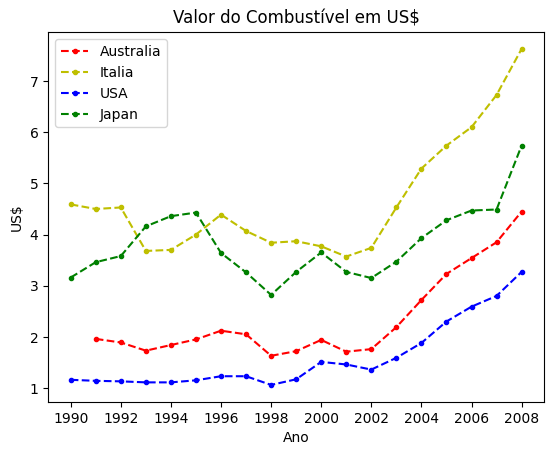

In [ ]:
plt.title('Valor do Combustível em US$')

plt.plot(gas['Year'], gas['Australia'], 'r.--', label = 'Australia')
plt.plot(gas['Year'], gas['Italy'], 'y.--', label = 'Italia')
plt.plot(gas['Year'], gas['USA'], 'b.--', label = 'USA')
plt.plot(gas['Year'], gas['Japan'], 'g.--', label = 'Japan')


plt.xlabel('Ano')
plt.ylabel('US$')
plt.xticks(gas['Year'][::2])
plt.legend()
plt.show()

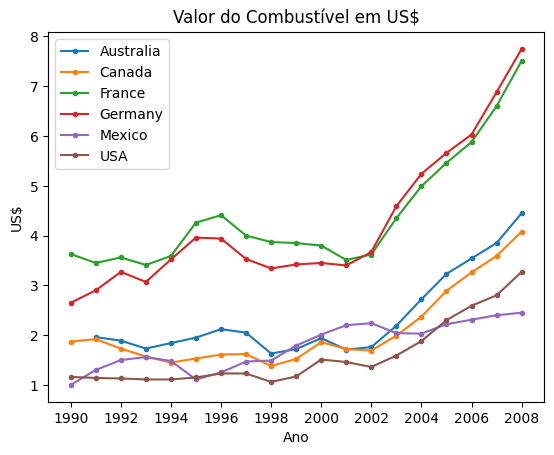

In [ ]:
plt.title('Valor do Combustível em US$')

lista_country = ['Australia', 'USA', 'Canada', 'Mexico', 'France', 'Germany']
for country in gas:
    if country in lista_country:
        plt.plot(gas['Year'], gas[country], label=[country], marker = '.')

plt.xlabel('Ano')
plt.ylabel('US$')
plt.xticks(gas['Year'][::2])
plt.legend()
plt.savefig('country.png')          # .png - antes do plt.show pois ele esvazia o arquivo
plt.savefig('country.pdf')          # .pdf
plt.show()

In [ ]:
## salvando gráfico



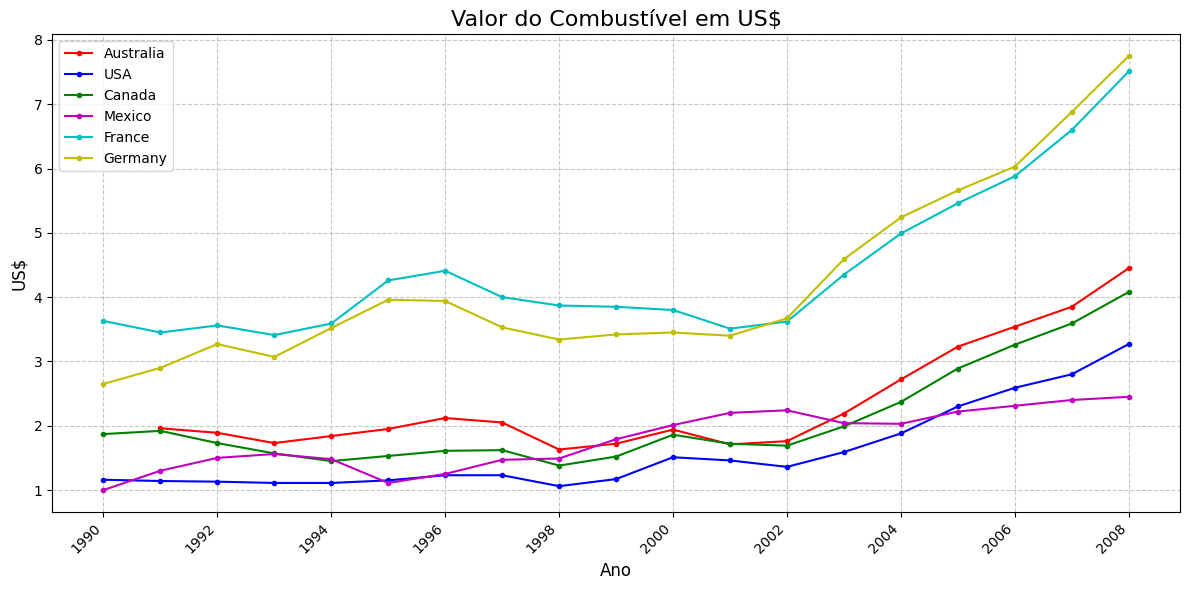

In [ ]:
# prompt: melhore o codigo acima

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'gas' is your Pandas DataFrame with fuel price data

plt.figure(figsize=(12, 6))                              # Adjust figure size for better readability
plt.title('Valor do Combustível em US$', fontsize=16)  # Increase title font size

lista_country = ['Australia', 'USA', 'Canada', 'Mexico', 'France', 'Germany']

# Define a dictionary for custom colors (optional)
colors = {
    'Australia': 'r',
    'USA': 'b',
    'Canada': 'g',
    'Mexico': 'm',
    'France': 'c',
    'Germany': 'y',
}

for country in lista_country:               # Iterate directly through lista_country
    if country in gas.columns:              # Check if the country is a valid column
        # Use custom color if defined, otherwise use default color cycle
        color = colors.get(country)
        plt.plot(gas['Year'], gas[country], label=country, marker='.', color=color)

plt.xlabel('Ano', fontsize=12)              # Increase label font size
plt.ylabel('US$', fontsize=12)              # Increase label font size
plt.xticks(gas['Year'][::2], rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(fontsize=10, loc='upper left')   # Adjust legend properties
plt.grid(True, linestyle='--', alpha=0.7)   # Add a grid for readability
plt.tight_layout()                          # Adjust layout to prevent overlapping elements
plt.show()